# Домашнее задание 2

## Задача 1. Неявный метод оценивания score-функции

На лекции мы обсудили методолгоию score matching, где функция потерь для обучения градиента логарифма плотности данных представляется как
$$
    \frac{1}{2} \mathbb{E}_{\pi}\bigl\| \mathbf{s}_{\boldsymbol{\theta}}(\mathbf{x}) - \nabla_\mathbf{x} \log \pi(\mathbf{x}) \bigr\|^2_2 \rightarrow \min_{\boldsymbol{\theta}}.
$$


В частности, мы познакомились с выводом **implicit score matching**.

Напомним, что функция потерь для обучения  **implicit score matching** выражается так:
$$
\frac{1}{2} \mathbb{E}_{\pi}\bigl\| s_{\boldsymbol{\theta}}(x) - \nabla_x \log \pi(x) \bigr\|^2_2 = \mathbb{E}_{\pi}\left[ \frac{1}{2}s^2_{\boldsymbol{\theta}}(x) + \nabla_{x} s_{\boldsymbol{\theta}}(x) \right] + \text{const}.
$$

В данном задании вам необходимо ответить на следующие вопросы:

1. Почему выражение справа в последней формуле с точки зрения практики лучше для нас, чем выражение слева?  

2. По каким причинам мы не пользуемся данной методологией **implicit score matching** и обращаемся к **denoising score matching** ?

3. Повторите вывод из лекции для **implicit score matching** в одномерном случае.

### Ответы:
1) В левой части формулы стоит распределение **$\pi(x)$**, из которого хотим научиться семплировать, но которого мы **не знаем**! В правой части мы от него избавились, заменив на модель $s_{\boldsymbol{\theta}}(x) = \nabla_x \log p(x|\theta)$, оценивающую градиент логарифма $p(x|\theta)$ -- предсказания (модельной оценки) истинного распределения данных $\pi(x)$.
    
2) Причин несколько:
    1. Дифференцирование выхода модели $\nabla_x s_{\boldsymbol{\theta}}(x)$ -- трата доп.времени;
    2. В многомерном случае от $\nabla_x s_{\boldsymbol{\theta}}(x)$ нужно еще брать след (tr, trace) -- тоже дорого и долго;
    3. $s_{\boldsymbol{\theta}}(x)$ на обычном входе $x$ будет утаскивать нас в моды, и мы не выучим редкие $x$, т.е., там, где $\pi(x)$ маленькое;
    4. Правая часть формулы, в силу своего вида, может содержать несколько локальных минимумов, а нам нужен, в идеале, 1

$\Rightarrow$ хотим более простую задачу квадратичного вида $||\cdot||^2$, которая бы учитывала редкие $\pi(x)$! Denoising score matching решает эти проблемы.

3) Вывод implicit score matching для одномерного случая:  
$$
\frac{1}{2} \mathbb{E}_{\pi}\bigl\| s_{\boldsymbol{\theta}}(x) - \nabla_x \log \pi(x) \bigr\|^2_2 = \frac{1}{2} \mathbb{E}_{\pi}\left[ s_{\boldsymbol{\theta}}^2(x) + \left(\nabla_x \log \pi(x)\right)^2 - 2s_{\boldsymbol{\theta}}(x)\cdot\nabla_x \log \pi(x)\right] =
$$
$$
= |\text{$\nabla_x \log \pi(x)$ не зав. от $\theta$, по кот. оптимизируем, $\Rightarrow$ можем убрать градиент в $const$}| = $$
$$
= \frac{1}{2} \mathbb{E}_{\pi}\left[ s_{\boldsymbol{\theta}}^2(x) - 2\int_{-\infty}^{+\infty} \pi(x)\nabla_x \log p(x|\theta)\nabla_x \log \pi(x) dx\right] + const =
$$
$$
= |log-derivative\text{ }trick| = \frac{1}{2} \mathbb{E}_{\pi}\left[ s_{\boldsymbol{\theta}}^2(x) - 2\int_{-\infty}^{+\infty} \pi(x)\nabla_x \log p(x|\theta)\frac{1}{\pi(x)} \nabla_x \pi(x) dx\right] + const =
$$
$$
= |\text{инт-е по частям}| = \frac{1}{2} \mathbb{E}_{\pi}\left[ s_{\boldsymbol{\theta}}^2(x) - 2\left(\pi(x)\nabla_x \log p(x|\theta)|_{-\infty}^{+\infty} - \int_{-\infty}^{+\infty} \nabla_x^2 \log p(x|\theta)\pi(x) dx\right)\right] + const =
$$
$$
= |\pi(-\infty)=\pi(+\infty) = 0| = \mathbb{E}_{\pi}\left[ \frac{1}{2} s_{\boldsymbol{\theta}}^2(x) + \nabla_x s_{\boldsymbol{\theta}}(x)\right] + const
$$

## Задача 2. Марковские цепи

Пусть последовательность $X_{0},...,X_{T}$ образует марковскую цепь. Покажите, что обратная по времени последовательность $X_{T},...,X_{0}$ тоже является марковской цепью, то есть:

$$ p_{X_{t-1}|X_{t},...,X_{T}}(x_{t-1}|x_{t},...,x_{T}) = p_{X_{t-1}|X_{t}}(x_{t-1}|x_{t}) .$$

Доказательство:
$$
p_{X_{t-1}|X_{t},...,X_{T}}(x_{t-1}|x_{t},...,x_{T}) = |\text{опр-е условной вер-ти}| = \frac{p_{X_{t-1},...,X_{T}}(x_{t-1}, x_{t},...,x_{T})}{p_{X_{t},...,X_{T}}(x_{t},...,x_{T})} =
$$
$$
= |\text{свойство марк.цепи $X_{0},...,X_{T}$}| = \frac{p_{X_{t-1}}(x_{t-1})p_{X_{t}|X_{t-1}}(x_{t}|x_{t-1})p_{X_{t+1}|X_{t}}(x_{t+1}|x_{t})...p_{X_{T}|X_{T-1}}(x_{T}|x_{T-1})}{p_{X_{t}}(x_{t})p_{X_{t+1}|X_{t}}(x_{t+1}|x_{t})p_{X_{t+2}|X_{t+1}}(x_{t+2}|x_{t+1})...p_{X_{T}|X_{T-1}}(x_{T}|x_{T-1})} =
$$
$$
= \frac{p_{X_{t-1}}(x_{t-1})p_{X_{t}|X_{t-1}}(x_{t}|x_{t-1})}{p_{X_{t}}(x_{t})} = |\text{th. Байеса}| = p_{X_{t-1}|X_{t}}(x_{t-1}|x_{t})
$$
чтд.

## Задача 3. Зашумленный метод оценивания score-функции для двумерных данных

В данной задаче вам предстоит дописать недостающие элементы в коде. Стоит отметить, что данная реализация не совсем такая, как в семинаре, и сделано это специально, чтобы вы не просто взяли код из семинара, а смогли и сами написать все необходимые блоки.

Запускать данный метод **denoising score matching** будем  на датасете лун, который выглядит так, как на картинке ниже.

Тогда давайте напишем функцию, которая создает такой датасет.

![title](https://i2.wp.com/miro.medium.com/1*itR36uLRt36bmFQVh-cVtQ.jpeg)

Сначала импортируем необходимые библиотеки. А уже потом заводим функцию **generate_moons_data**, которая возвращает нам данные, располагающиеся в виде лун.

In [1]:
from tqdm import tqdm
from typing import List, Tuple
import math

import numpy as np
from sklearn.datasets import make_moons

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_moons_data(count: int) -> tuple:
    data, labels = make_moons(n_samples=count, noise=0.1)
    data = data.astype("float32")
    split = int(0.8 * count)
    train_data, test_data = data[:split], data[split:]
    train_labels, test_labels = labels[:split], labels[split:]
    return train_data, train_labels, test_data, test_labels

Возьмем 5000 точек для визуализации данных:

In [3]:
COUNT = 5000

train_data, train_labels, test_data, test_labels = generate_moons_data(COUNT)

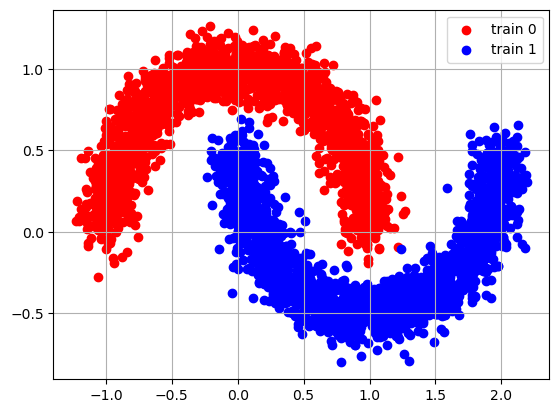

In [4]:
plt.scatter(train_data[train_labels==0,0],train_data[train_labels==0,1], color='red', label="train 0")
plt.scatter(train_data[train_labels==1,0],train_data[train_labels==1,1], color='blue', label="train 1")
plt.grid()
plt.legend()

Давайте вспомним теорию.  


Идея заключается в следующем. Мы определяем score-функцию
$$
    \mathbf{s}_{\boldsymbol{\theta}}(\mathbf{x}) = \nabla_{\mathbf{x}}\log p(\mathbf{x}| \boldsymbol{\theta}).
$$

Наша основная задача состоит в том, что нам хотелось бы минимизировать дивергенцию Фишера, чтобы получить score-функцию:
$$
    D_F(\pi, p) = \frac{1}{2}\mathbb{E}_{\pi}\bigl\| \mathbf{s}_{\boldsymbol{\theta}}(\mathbf{x}) - \nabla_{\mathbf{x}} \log \pi(\mathbf{x}) \bigr\|^2_2 \rightarrow \min_{\boldsymbol{\theta}}.
$$

И если нам бы удалось оценить score-функцию, то мы могли бы использовать динамику Ланжевена для генерации выборки из необходимого распределения:
$$
    \mathbf{x}_{l + 1} = \mathbf{x}_l + \frac{\eta}{2} \cdot \nabla_{\mathbf{x}_l} \log p(\mathbf{x}_l | \boldsymbol{\theta}) + \sqrt{\eta} \cdot \boldsymbol{\epsilon}, \quad \boldsymbol{\epsilon} \sim \mathcal{N}(0, \mathbf{I}).
$$

Однако дивергенция Фишера трудноразрешима (так как мы не знаем честную score-функцию), и мы используем процедуру добавления шума **denoising score matching**  для оценки score-функции по зашумленным данным $$\mathbf {x}_{\sigma} = \mathbf {x} + \sigma \cdot \boldsymbol{\epsilon}.$$

Как мы выяснили на лекции, минимизация дивергенции Фишера для зашумленных данных эквивалентна следующей задаче:
\begin{multline*}
    \mathbb{E}_{q(\mathbf{x}_{\sigma})}\bigl\| \mathbf{s}_{\boldsymbol{\theta}, \sigma}(\mathbf{x}_{\sigma}) - \nabla_{\mathbf{x}_{\sigma}} \log q(\mathbf{x}_{\sigma}) \bigr\|^2_2
    = \mathbb{E}_{\pi(\mathbf{x})} \mathbb{E}_{q(\mathbf{x}_{\sigma} | \mathbf{x})}\bigl\| \mathbf{s}_{\boldsymbol{\theta}, \sigma}(\mathbf{x}_{\sigma}) - \nabla_{\mathbf{x}_{\sigma}} \log q(\mathbf{x}_{\sigma} | \mathbf{x}) \bigr\|^2_2 + \text{const}(\boldsymbol{\theta}).
\end{multline*}

Здесь
$$
    \log q(\mathbf{x}_{\sigma} | \mathbf{x}) = - \frac{\mathbf{x}_{\sigma} - \mathbf{x}}{\sigma^2} = - \frac{\boldsymbol{\epsilon}}{\sigma}.
$$

Тогда финальная формула для denoising score matching это

$$
\mathbb{E}_{\pi(\mathbf{x})} \mathbb{E}_{q(\mathbf{x}_{\sigma} | \mathbf{x})}\bigl\| \mathbf{s}_{\boldsymbol{\theta}, \sigma}(\mathbf{x}_{\sigma}) + \frac{\boldsymbol{\epsilon}}{\sigma} \bigr\|^2_2 \rightarrow \min_{\boldsymbol{\theta}}.
$$

In [5]:
class DenoisingScoreMatcher(nn.Module):
    def __init__(
            self,
            score_model: nn.Module,
            input_shape: Tuple[int],
            sigma: float
        ):
        super().__init__()

        self.score_model = score_model
        self.input_shape = input_shape
        self.sigma = sigma

    @property
    def device(self):
        return next(self.parameters()).device

    def forward(self, x: torch.Tensor):
        # ====
        # your code
        # написать, как семплируется гауссовский шум
        # получить зашумленные данные через исходные и шум
        noise = torch.randn_like(x)
        noisy_x = x + self.sigma * noise
        # =====

        # посчитать score-функцию для зашумленных данных
        s = self.score_model(noisy_x)

        # ====
        # your code
        # запишите функцию потерь метода
        # это МСЕ Loss
        loss = (s + noise/self.sigma)**2
        # =====
        return loss

    def loss(self, x: torch.Tensor):
        return {"total_loss": self.forward(x).mean(dim=0).sum()}

    def langevin_dynamics(self, x: torch.Tensor, num_steps: int, eta: float):
        # =====
        # your code
        # Запишите итеративную процедуру динамики Ланжевена

        for _ in range(num_steps):
            x += eta*self.score_model(x) + np.sqrt(eta)*torch.randn_like(x)

        # =====
        return x

    def sample(self, num_samples: int = 64, num_steps: int=100, eta: float = 0.01):
        with torch.no_grad():
            # мы семплируем x_0 из равномерного распределения на отрезке U[-1, 1]
            x0 = 2. * torch.rand_like(torch.empty(num_samples, *self.input_shape)) - 1.
            x0 = x0.to(self.device)

            # запустить динамику Ланжевена
            x = self.langevin_dynamics(x0, num_steps=num_steps, eta=eta)

        return x


def test_denoiser_score_matcher():
    matcher = DenoisingScoreMatcher(
        score_model=nn.Linear(2, 2),
        input_shape=(2,),
        sigma=0.1
    )
    x = torch.rand(16, 2)
    assert x.size() == matcher(x).size()
    loss = matcher.loss(x)["total_loss"]
    assert len(loss.size()) == 0
    assert list(matcher.sample(4).size()) == [4, 2]

test_denoiser_score_matcher()

In [6]:
# ====
# your code
# Выберите гиперпараметры метода

BATCH_SIZE = 50
EPOCHS = 1000  # > 50
LR = 1e-2  # > 1e-3
HIDDEN_SIZE = 128  # > 32
SIGMA = 0.05  # 0.01 < x < 1.0
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

# ====
# your code
# определите архитектуру модели, смотрите семинар 2
#
def toy_net(hiddens):
    model = []
    for inp,outp in zip(hiddens[:-1],hiddens[1:]):
        model.append(torch.nn.Linear(inp,outp,bias=True))
        model.append(torch.nn.ReLU())
    model.pop()
    return torch.nn.Sequential(*model)


HIDDENS = [2,64,128,256,128,64,2]
score_model = toy_net(HIDDENS)
# ====

matcher = DenoisingScoreMatcher(
    score_model=score_model, input_shape=(2,), sigma=SIGMA
)

optimizer = torch.optim.Adam(matcher.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.95)

Также вам необходимо описать функцию тренировки данной модели и запустить ее.

In [7]:
def train_model(
    matcher,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    optimizer=optimizer,
    scheduler=scheduler,
    device="cpu",
    n_samples=512):

    train_losses = []
    test_losses = []
    matcher.to(device)
    for epoch in tqdm(range(epochs)):
        matcher.train()
        train_losses.append([])
        for batch in train_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            loss = matcher.loss(batch)["total_loss"]
            loss.backward()
            optimizer.step()
            train_losses[epoch].append(loss.item())

        scheduler.step()

        matcher.eval()
        with torch.no_grad():
            test_losses.append([])
            for batch in test_loader:
                batch = batch.to(device)
                loss = matcher.loss(batch)["total_loss"]
                test_losses[epoch].append(loss.item())

        if epoch % (epochs // 10) == 0:
            print(
                f" Train Loss: {np.mean(train_losses[epoch]):.4f} | Test Loss: {np.mean(test_losses[epoch]):.4f}"
            )

    sample = matcher.sample(num_samples=n_samples)

    return sample, train_losses, test_losses

  0%|                                          | 2/1000 [00:00<01:24, 11.81it/s]

 Train Loss: 812.2448 | Test Loss: 801.0046


 10%|████                                    | 102/1000 [00:06<01:00, 14.80it/s]

 Train Loss: 752.6248 | Test Loss: 779.0693


 20%|████████                                | 202/1000 [00:13<00:54, 14.65it/s]

 Train Loss: 747.4015 | Test Loss: 713.4456


 30%|████████████                            | 302/1000 [00:20<00:46, 14.87it/s]

 Train Loss: 749.0005 | Test Loss: 741.9102


 40%|████████████████                        | 402/1000 [00:27<00:42, 13.97it/s]

 Train Loss: 748.4404 | Test Loss: 745.7271


 50%|████████████████████                    | 502/1000 [00:34<00:34, 14.28it/s]

 Train Loss: 735.5200 | Test Loss: 742.5211


 60%|████████████████████████                | 602/1000 [00:41<00:27, 14.53it/s]

 Train Loss: 748.5968 | Test Loss: 747.8811


 70%|████████████████████████████            | 702/1000 [00:48<00:20, 14.56it/s]

 Train Loss: 741.7843 | Test Loss: 727.6733


 80%|████████████████████████████████        | 802/1000 [00:55<00:13, 14.56it/s]

 Train Loss: 738.1739 | Test Loss: 724.8944


 90%|████████████████████████████████████▏   | 904/1000 [01:02<00:06, 14.56it/s]

 Train Loss: 748.7708 | Test Loss: 756.7981


100%|███████████████████████████████████████| 1000/1000 [01:08<00:00, 14.51it/s]


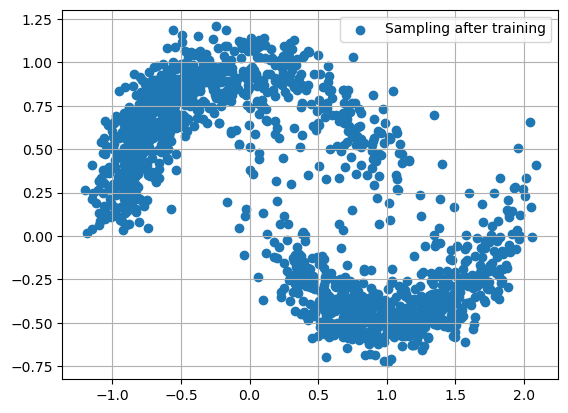

In [8]:
sample, train_losses, test_losses = train_model(matcher,
                                                train_loader,
                                                test_loader,
                                                epochs=EPOCHS,
                                                optimizer=optimizer,
                                                scheduler=scheduler,
                                                device="cuda" if torch.cuda.is_available() else "cpu",
                                                n_samples=1500)

plt.scatter(sample[:,0],sample[:,1], label="Sampling after training")
plt.grid()
plt.legend()

Уже обученную модель matcher можно запустить и посмотреть, какие семплы она воспроизводит.

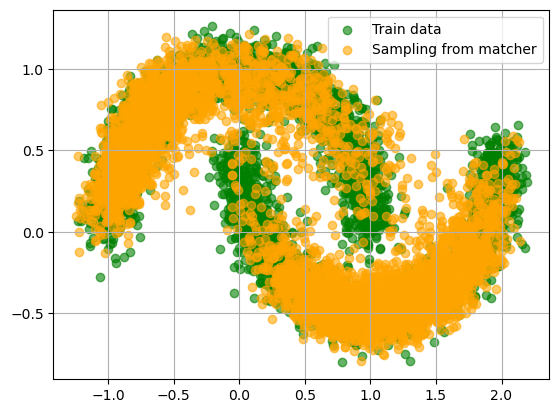

In [9]:
# ====
# your code
# выберите параметры для семплирования динамикой Ланжевена
NUM_SAMPLES = 5000
NUM_STEPS = 1000
ETA = 0.01
# ====

samples = matcher.sample(num_samples=NUM_SAMPLES, num_steps=NUM_STEPS, eta=ETA).cpu()

# рисуем
plt.scatter(train_data[:, 0], train_data[:, 1], color='green', alpha=0.6, label='Train data')
plt.scatter(samples[:,0],samples[:,1], color='orange', alpha=0.6, label="Sampling from matcher")
plt.grid()
plt.legend()

### Опишите полученные вами изображения
Модель неплохо выучила распределение, полученная выборка похожа на исходную выборку для обучения, но они не идентичны, модель семплирует новые точки, которых не было в обучающей выборке. Этого мы и хотели добиться. 

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 261.39it/s]


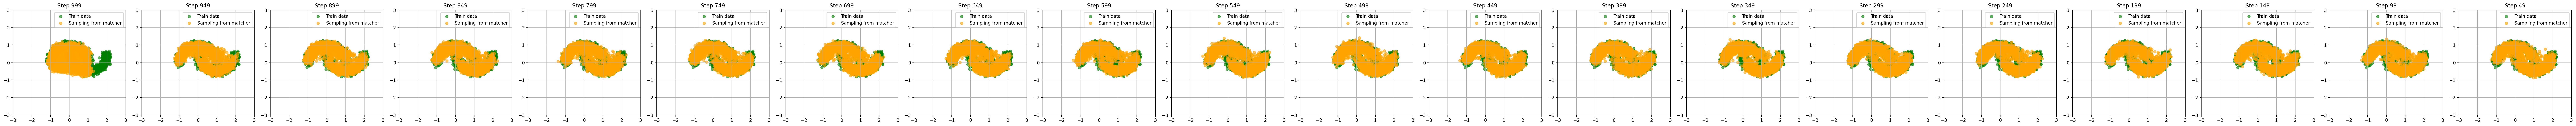

In [10]:
# нарисуем промежуточные шаги
traj = []
sample = 2. * torch.rand_like(torch.empty(NUM_SAMPLES, 2)) - 1.
timesteps = list(range(NUM_STEPS))[::-1]

for i, t in enumerate(tqdm(timesteps)):
    with torch.no_grad():
        score = matcher.score_model(sample)
    # применяем динамику Ланжевена
    sample += ETA*score + np.sqrt(ETA)*torch.randn_like(sample)

    # сохраняем промежуточныe состояния
    if i % (NUM_STEPS // 20) == 0:
        traj.append(sample.clone().detach())


# рисуем
fig, ax = plt.subplots(1, len(traj), figsize=(4*len(traj), 4), dpi=200)
for idx in range(len(traj)):
    ax[idx].scatter(train_data[:, 0], train_data[:, 1], color='green', alpha=0.6, label='Train data')
    ax[idx].scatter(traj[idx][:, 0], traj[idx][:, 1], color='orange', alpha=0.6, label='Sampling from matcher')
    ax[idx].set_title(f"Step {timesteps[(NUM_STEPS // 20)*idx]}")
    ax[idx].set_xlim(-3, 3)
    ax[idx].set_ylim(-3, 3)
    ax[idx].grid()
    ax[idx].legend()
plt.tight_layout()
plt.show()